# Case Study: Predicting the prices of used cars using Linear Regression


## Context: 
    
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

## Objective:

**The dataset aims to answer the following key questions:**

- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

## Attribute Information:

- S.No.: Serial Number
- Name: Name of the car which includes Brand name and Model name
- Location: The location in which the car is being sold or is available for purchase Cities
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power: The maximum power of the engine in bhp.
- Seats: The number of seats in the car.
- New_Price: The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price: The price of the used car in INR Lakhs (1 Lakh = 100, 000)

# Let's start coding!

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

### Import libraries

In [2]:
# Import libraries.
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To plot graphs
%matplotlib inline

# To build linear regression_model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

### Load and explore the data

In [3]:
# Load the data into pandas dataframe
data = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

# <a id='link1'>Overview of the data</a>

In [4]:
# Make another copy of data
df = data.copy()
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [5]:
# view random sample of data
np.random.seed(2)
df.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,NaN,13.50
2603,2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,11.50
4337,4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.41
6625,6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0,NaN,NaN
2846,2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,5.23
1237,1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,NaN,21.00


<IPython.core.display.Javascript object>

**Observations**
* It seems reasonable to drop the *S.No.* column as it won't be contributing much to our analysis.
* *Mileage*, *Engine* and *Power* have different units of measurement.
* The *New_Price* column seems to have a lot of NaN values.

In [6]:
# check number of rows and columns
df.shape

(7253, 14)

<IPython.core.display.Javascript object>

In [7]:
# let's take a look at the column names
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

<IPython.core.display.Javascript object>

In [8]:
# check the number of unique values in each column of the dataframe
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

**Observations**
* There are 7253 rows and 14 columns.
* *Mileage*, *Engine* and *Power* need to be preprocessed and converted to numerical data.
* *Fuel_Type*, *Transmission* and *Owner_Type* should be converted to category
* *Seats* might require further analysis
* Dependent variable is *Price*.

### Checking for missing values

In [10]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**Observation**
* Missing values in *Mileage*, *Engine*, *Power*, *Seats* and *Price*
* Percentage of missing values in the *New_price* column to high to consider imputing with other values. Dropping the column would be the best course of action for the model.

# Data Preprocessing

In [11]:
# Check mileage column for values that end with km/kg and kmpl
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg = kmkg + 1
    elif str(i).endswith("kmpl"):
        kmpl = kmpl + 1
print("Km/Kg : {} ".format(kmkg))
print("Kmpl : {} ".format(kmpl))

Km/Kg : 74 
Kmpl : 7177 


<IPython.core.display.Javascript object>

## Mileage
We will be removing km/kg and kmpl and converting the values to float

In [12]:
# function to convert variable to float
def mileage_to_float(mileage):
    if isinstance(mileage, str):  # checks for string values
        return float(mileage.replace("km/kg", "").replace("kmpl", ""))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [13]:
df["Mileage"] = df["Mileage"].apply(mileage_to_float)

<IPython.core.display.Javascript object>

## Power
First, we will convert the null string values to nan. Then remove bhp and convert to float. 

In [14]:
# checks for null string and converts to np.nan
df.loc[df["Power"].str.contains("null", na=False), "Power"] = np.nan

<IPython.core.display.Javascript object>

In [15]:
def pow_to_float(power):
    if isinstance(power, str):
        return float(power.replace("bhp", ""))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [16]:
df["Power"] = df["Power"].apply(pow_to_float)

<IPython.core.display.Javascript object>

## Engine
Remove CC and convert to float.

In [17]:
def engine_to_float(engine):
    """In the weight column I'm replacing the terminal 'lbs' with
    the empty string and converting to a float. Non-strings are
    np.nans and are kept as np.nans."""
    if isinstance(engine, str):
        return float(engine.replace("CC", ""))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [18]:
df["Engine"] = df["Engine"].apply(engine_to_float)

<IPython.core.display.Javascript object>

# Feature Engineering
We'll be splitting the *name* column into brand name and model name

In [19]:
# get brand names and assign to Brandname column
df["Brandname"] = df.Name.str.split().str.get(0)

<IPython.core.display.Javascript object>

In [20]:
# get model names and assign to Modelname column
df["Modelname"] = df.Name.str.split().str.get(1)

<IPython.core.display.Javascript object>

We will be dropping the *Name* column along with *New_Price* and *S.No.*

In [21]:
df = df.drop(["New_Price", "S.No.", "Name"], axis=1)

<IPython.core.display.Javascript object>

In [22]:
df.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brandname,Modelname
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,Hyundai,EON
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,Micra
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,Toyota,Innova
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20,Volkswagen,Vento
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95,Tata,Indica


<IPython.core.display.Javascript object>

**Let's look at the summary of our data.**

In [23]:
# View data summary of all datatypes
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,NaN,NaN,NaN,18.1416,4.5622,0,15.17,18.16,21.1,33.54
Engine,7207,NaN,NaN,NaN,1616.57,595.285,72,1198,1493,1968,5998
Power,7078,NaN,NaN,NaN,112.765,53.4936,34.2,75,94,138.1,616
Seats,7200,NaN,NaN,NaN,5.27972,0.81166,0,5,5,5,10


<IPython.core.display.Javascript object>

## Insights:

- The *Brandname* and *Modelname* columns have 33 and 219 unique values respectively.
- There are 5 different fuel types in the dataset
- *Year* ranges from 1996 to 2019.
- Average *Price* is 9.479 INR Lakhs.


**Before we proceed, let's have a look at the graphical visualization of the data to understand it better**

## Exploratory Data Analysis

## Univariate analysis

### Distribution of each numerical variable

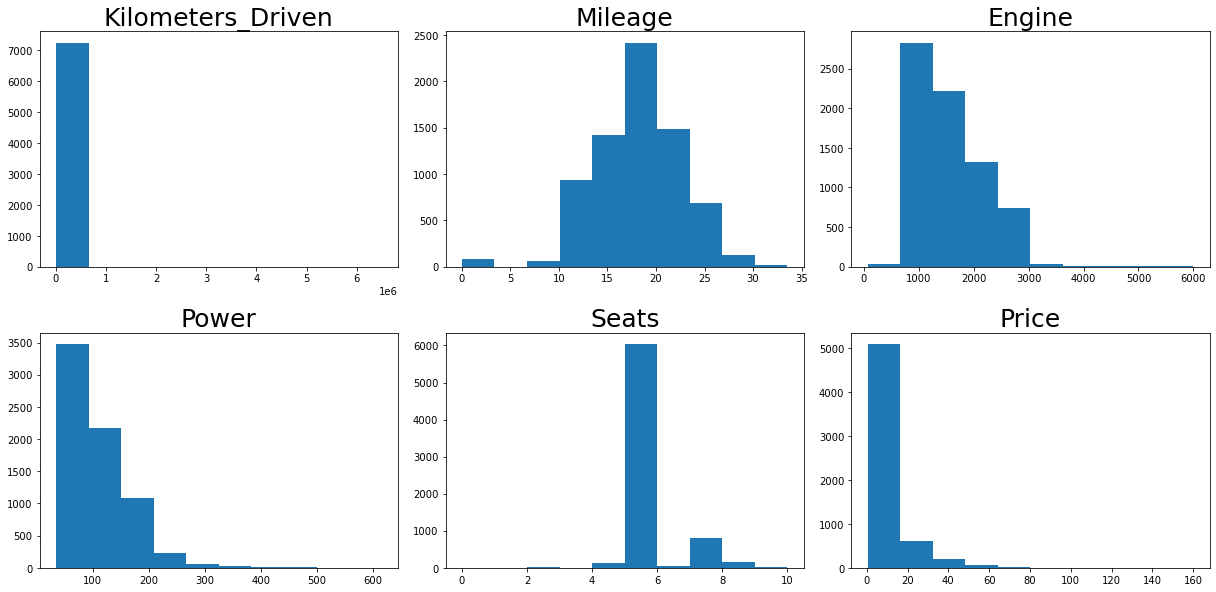

<IPython.core.display.Javascript object>

In [24]:
# lets plot histogram of all numerical variables

all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove("Year")
plt.figure(figsize=(17, 75))


for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df[all_col[i]])
    # sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

**Observations**
* A lot of the numerical variables seem to be skewed to the right.
* This is most apparent in *Kilometers_Driven* and *Price* which are heavily skewed to the right.
* *Mileage* seems to have a distribution close to normal.
* *Seats* would probably give more insight as category.

### Let's fix the missing values

* We can impute the missing values with the median for skewed values and the mean for unskewed values
* We will also be dropping the missing values in our proposed dependent variable *Price* for better modeling

In [25]:
# fill missing values with mean and median
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True)
df.dropna(subset = ["Price"], inplace=True)#drop missing values in price column



<IPython.core.display.Javascript object>

### Categorical Variable Analysis

We will be including *Seats* in this analysis

**Let's convert the *object* type columns to *category* type**

In [26]:
#convert to category datatype
df["Location"] = df["Location"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Seats"] = df["Seats"].astype("category")


<IPython.core.display.Javascript object>

In [27]:
def count_percent(plot, variable):  # function to get countplot percentages
    total = len(variable)  # length of the variable
    for i in perc.patches:
        percentage = "{:.1f}%".format(
            100 * i.get_height() / total
        )  # percentage of each class of the category
        x = i.get_x() + i.get_width() / 2 - 0.05  # width of the plot
        y = i.get_y() + i.get_height()  # height of the plot
        perc.annotate(percentage, (x, y), size=20)  # annotate the percantage

<IPython.core.display.Javascript object>

### Location

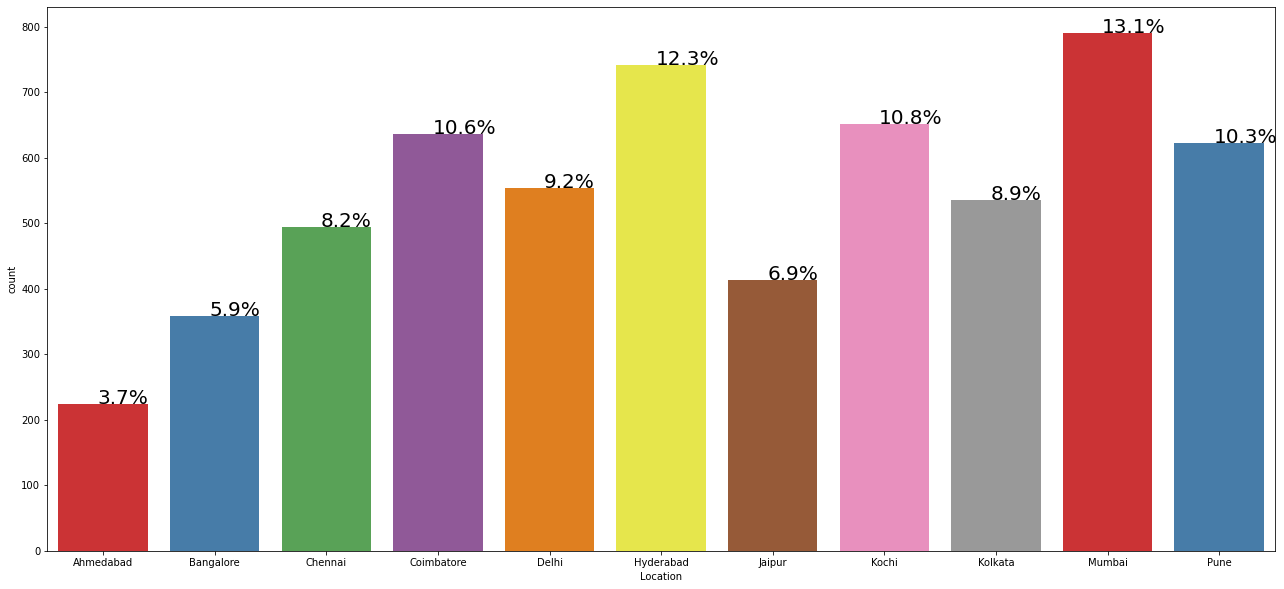

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(22, 10))
perc = sns.countplot(df["Location"], palette="Set1")
count_percent(perc, df["Location"])

**Observation**
* Mumbai is the location with the highest percentage of used cars sold and Ahmedabad the lowest.

### Fuel Type

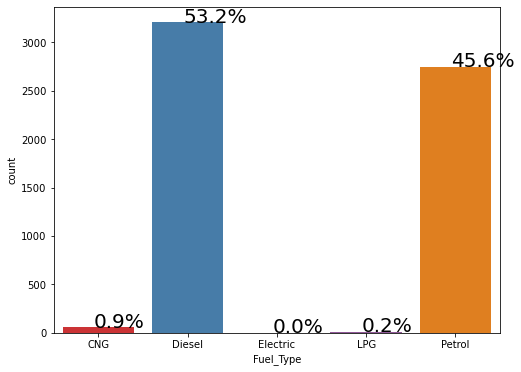

<IPython.core.display.Javascript object>

In [29]:
plt.figure(figsize=(8, 6))
perc = sns.countplot(df["Fuel_Type"], palette="Set1")
count_percent(perc, df["Fuel_Type"])

**Observation**
* Diesel and Petrol are the dominant fuel types both adding up to 98.8% of the used car's fuel types.

### Transmission

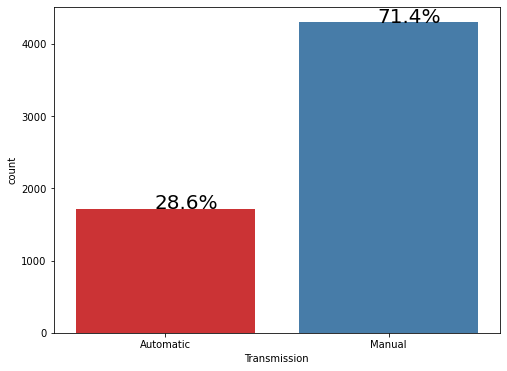

<IPython.core.display.Javascript object>

In [30]:
plt.figure(figsize=(8, 6))
perc = sns.countplot(df['Transmission'], palette="Set1")
count_percent(perc, df['Transmission'])


**Observation**
* Manual is the preferred transmission for the used cars.

### Owner Type

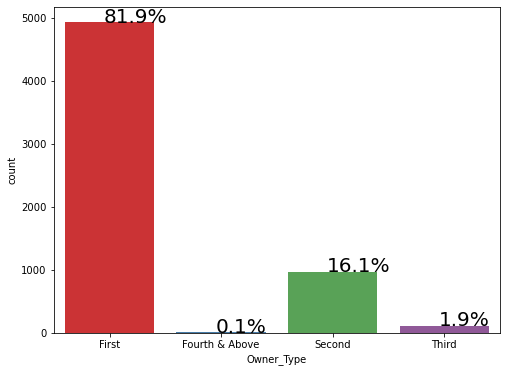

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(8, 6))
perc = sns.countplot(df['Owner_Type'], palette="Set1")
count_percent(perc, df['Owner_Type'])


**Observation**
* First owners are the most common owner type by a distance, with the rest just addind up to 18.1%.

### Seats

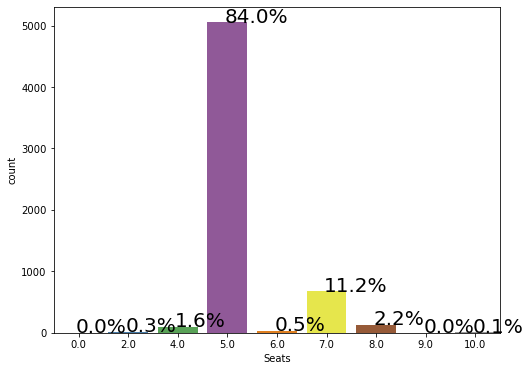

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(8, 6))
perc = sns.countplot(df['Seats'], palette="Set1")
count_percent(perc, df['Seats'])


**Observation**
* 84% of the cars have 5 seats and 11.2% have 7 seats.

## Bivariate Analysis

### Let's look at correlations

<AxesSubplot:>

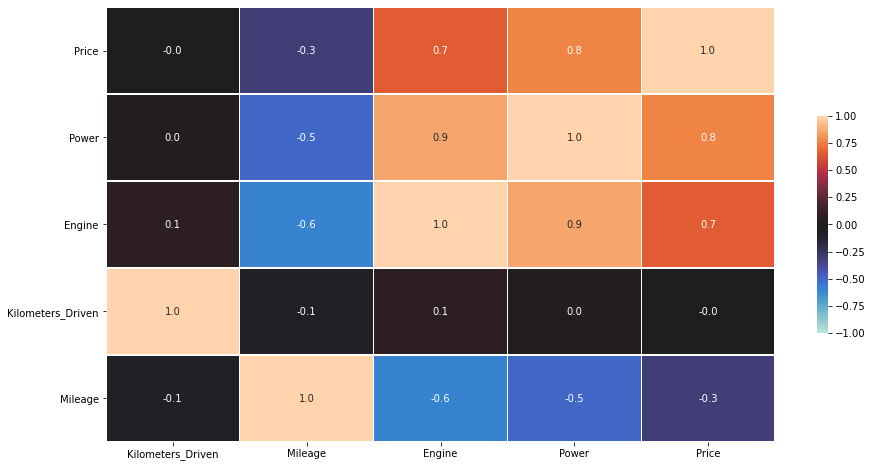

<IPython.core.display.Javascript object>

In [33]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col.remove("Year")  # dropping year column as it is temporal variable
corr = (
    df[num_col].corr().sort_values(by=["Price"], ascending=False)
)  # sorting correlations w.r.t life expectancy

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    annot=True,
    fmt=".1f",
    vmin=-1,
    vmax=1,
    center=0,
    square=False,
    linewidths=0.7,
    cbar_kws={"shrink": 0.5},
)

**Observations**

* *Price* is highly positively correlated with *Engine* and *Power*, which means that as Engine and Power increases, Price tends to increase.
* There is high positive correlation between *Engine* and *Power*
* *Mileage* seems to be negatively correlated with *Engine* and *Power*, which could indicate that as Engine and Power increases, Mileage might decrease slightly.

### Let's look at the graphs of a few variables with *Price*.

***Price* vs *Power* vs *Transmission***

<AxesSubplot:xlabel='Power', ylabel='Price'>

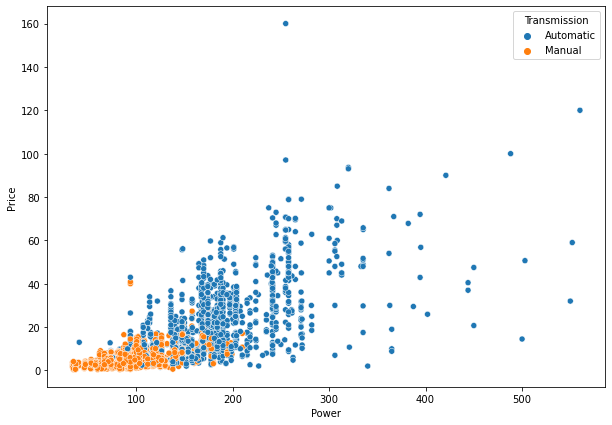

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Price", x="Power", hue="Transmission", data=df)

**Observations**
* Price seems to increase with higher Power.
* Automatic cars have more maximum power than Manual cars.

***Price* vs *Fuel_Type***

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

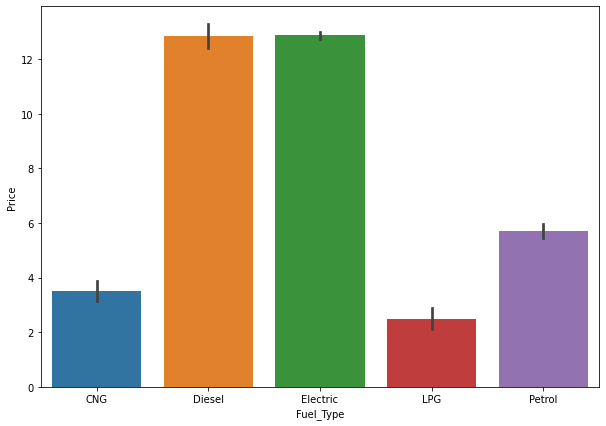

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(10, 7))
sns.barplot(y="Price", x="Fuel_Type", data=df)

**Observation**
* Diesel and Electric fuel types are the most expensive cars.
* Petrol, CNG and LPG are more economical choices.

***Price* vs *Owner_Type***

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

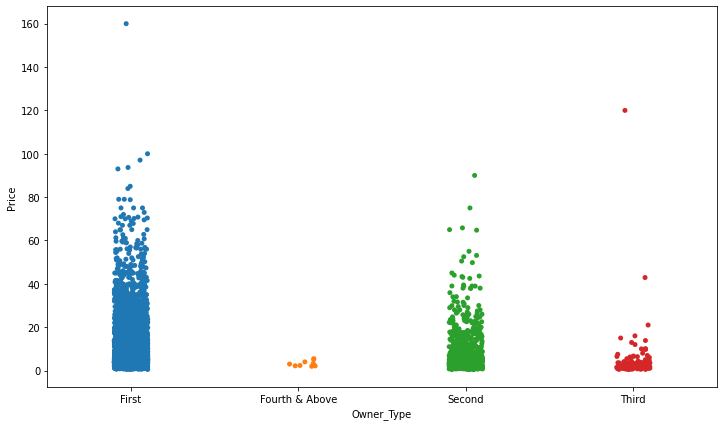

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(12, 7))
sns.stripplot(y="Price", x="Owner_Type", data=df)

**Observation**
* There seems to be a relationship between the owner type and price, where the fewer the previous owners the more expensive the car.
* First owner has the highest price, followed by Second, Third, Fourth and Above in that order.

***Price* vs *Seats***

<AxesSubplot:xlabel='Seats', ylabel='Price'>

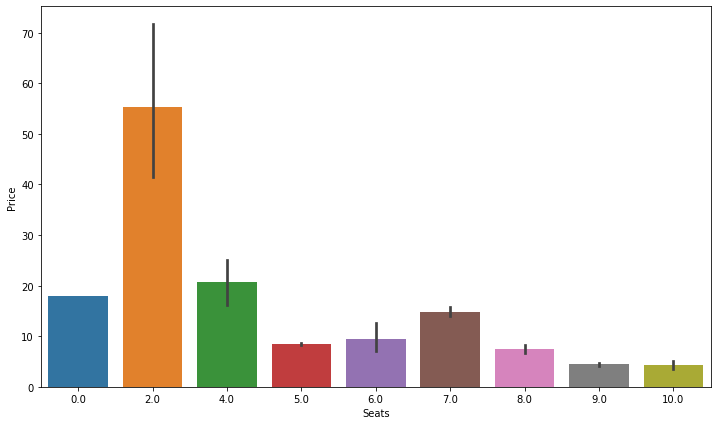

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(12, 7))
sns.barplot(y="Price", x="Seats", data=df)

**Observations**
* Two seater cars have the highest price.
* Cars with 9 and 10 seats seem to be the least expensive.

***Price* vs *Location***

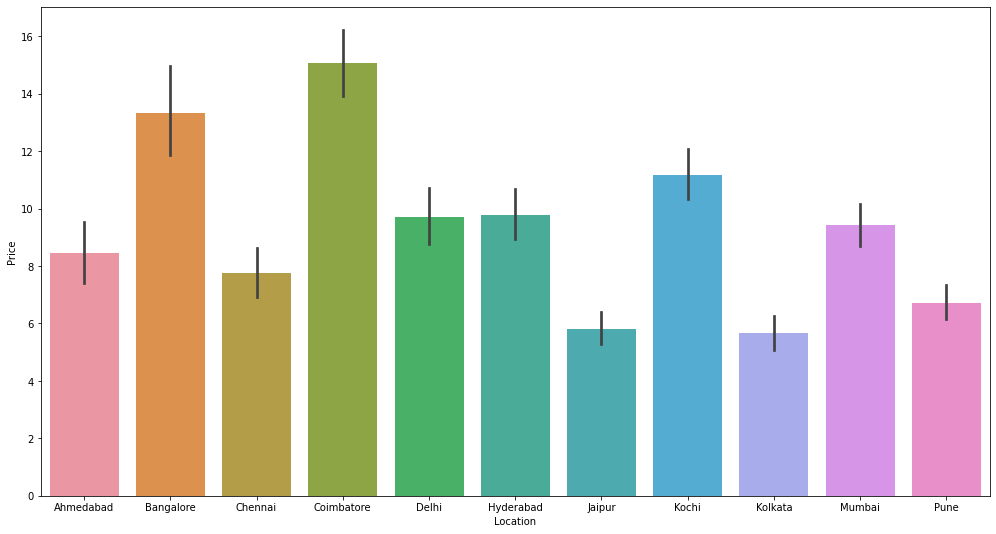

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(17, 9))
sns.barplot(x="Location", y="Price", data=df)
plt.show()

**Observation**
* The most expensive cars are sold in Coimbatore and Bangalore.
* The least expensive are sold in Kolkata and Jaipur.

**Let's check the variation in *Price* with *Year***

<AxesSubplot:xlabel='Year', ylabel='Price'>

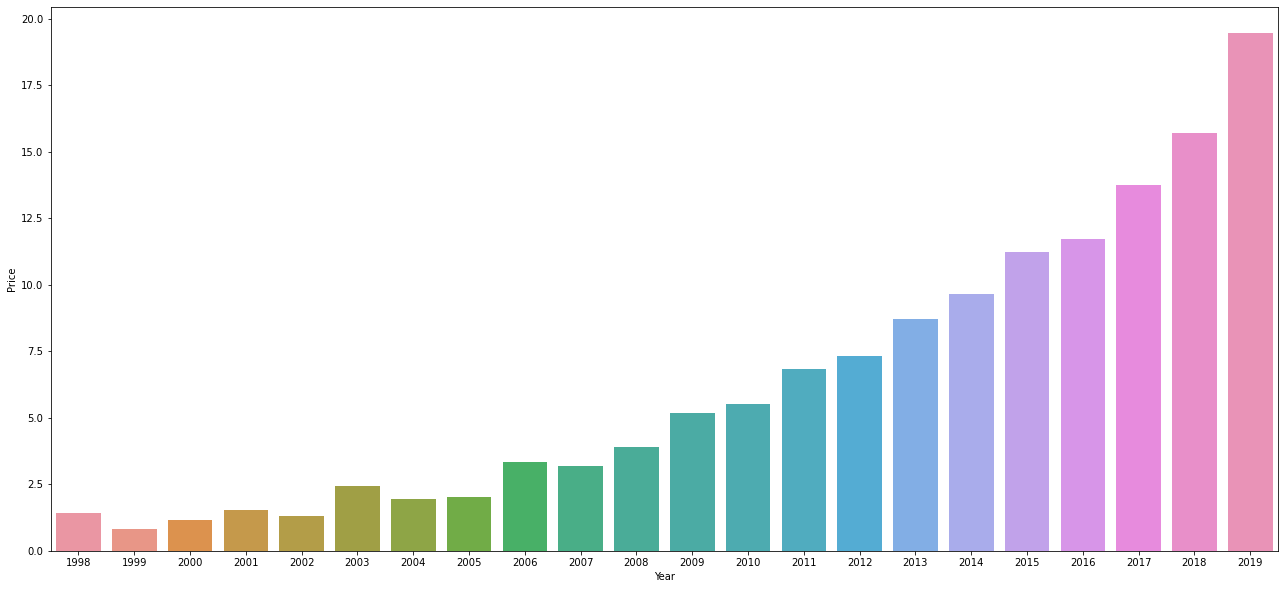

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(22, 10))
sns.barplot(x="Year", y="Price", data=df, ci=None)

**Observation**
* There seems to be fluctuation in used car prices from 1998 to 2007.
* From 2007 there is a steady increase in prices year on year, where newer models of used cars cost more than previous years.

***Price* vs *Brandname***

<AxesSubplot:xlabel='Price', ylabel='Brandname'>

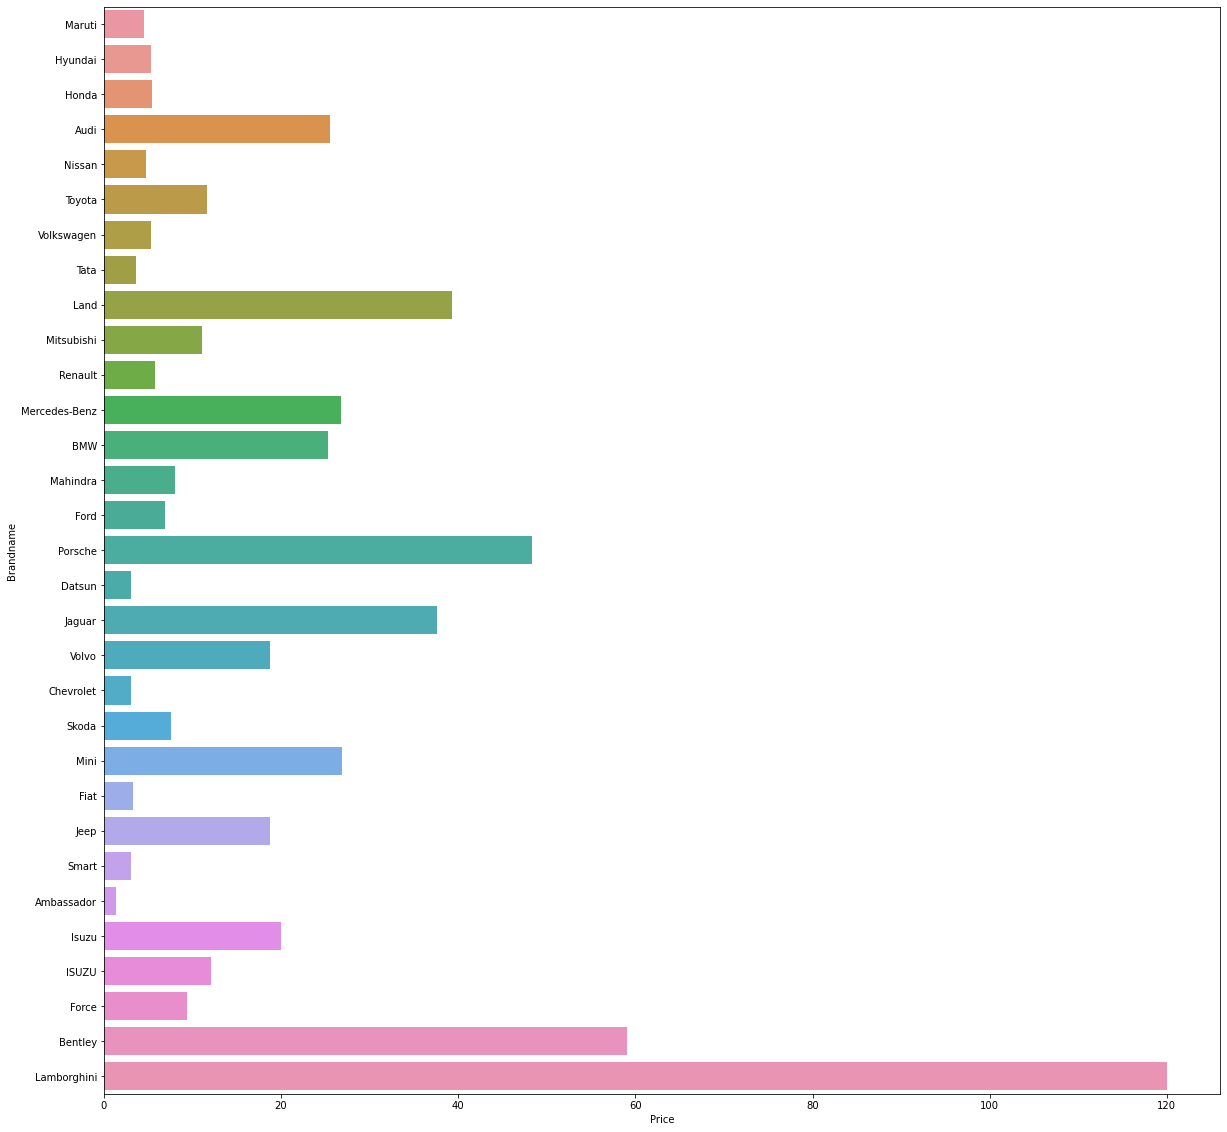

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(20, 20))
sns.barplot(y="Brandname", x="Price", data=df, ci=None)

**There are a lot of unique values in this column. We will attempt to group car brands with similar average prices together for better modelling**

## Feature Engineering

### Lets us group Brand names

First, we will be dropping values with low value counts, which might not be so significant.

In [41]:
df.Brandname.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Lamborghini         1
Smart               1
Bentley             1
Name: Brandname, dtype: int64

<IPython.core.display.Javascript object>

* We will be dropping "Force",
    "ISUZU",
    "Isuzu",
    "Bentley",
    "Smart",
    "Ambassador",
    "Lamborghini",
    "Hindustan",

In [42]:
cd = [
    "Force",
    "ISUZU",
    "Isuzu",
    "Bentley",
    "Smart",
    "Ambassador",
    "Lamborghini",
    "Hindustan",
]  # compiling values in a list

<IPython.core.display.Javascript object>

In [43]:
# dropping values from Brandname column
for i in cd:
    df.drop(df.index[df["Brandname"] == i], inplace=True)
    


<IPython.core.display.Javascript object>

### We will be creating 5 brand groups based on average prices

In [44]:
# creating a dictionary where we hard-code Brandname values into Brand1, Brand2, Brand3, Brand4 and Brand5
# These values are grouped based on average prices
cars = df.Brandname.tolist()
car_group = dict()
for i in cars:
    if (
        i == "Chevrolet"
        or i == "Datsun"
        or i == "Fiat"
        or i == "Tata"
        or i == "Maruti"
        or i == "Nissan"
        or i == "Volkswagen"
        or i == "Hyundai"
        or i == "Honda"
        or i == "Renault"
    ):
        car_group[i] = "Brand1"
    elif (
        i == "Ford"
        or i == "Skoda"
        or i == "Mahindra"
        or i == "Mitsubishi"
        or i == "Toyota"
    ):
        car_group[i] = "Brand2"
    elif i == "Jeep" or i == "Volvo":
        car_group[i] = "Brand3"
    elif i == "BMW" or i == "Audi" or i == "Mercedes-Benz" or i == "Mini":
        car_group[i] = "Brand4"
    elif i == "Jaguar" or i == "Land" or i == "Porsche":
        car_group[i] = "Brand5"
    else:
        df.drop(df.index[df["Brandname"] == i], inplace=True)

<IPython.core.display.Javascript object>

In [45]:
# create new column Brandgroup and map brandnames to car_group
df["Brandgroup"] = df["Brandname"].map(car_group)

<IPython.core.display.Javascript object>

In [46]:
# convert to categorical
df["Brandgroup"] = df["Brandgroup"].astype("category")

<IPython.core.display.Javascript object>

In [47]:
# now we can drop Brandname and Modelname
df = df.drop(["Brandname", "Modelname"], axis=1)

<IPython.core.display.Javascript object>

In [48]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brandgroup
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Brand1
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Brand1
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Brand1
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Brand1
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Brand4


<IPython.core.display.Javascript object>

### Transforming and standardizing continuous features

We will be using the PowerTransformer to perform a Yeo-Johnson power transformation on our numerical data to fix some of the skewness and ensure that our features are normally distributed. 

In [49]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(
    method="yeo-johnson", standardize=True
)  # set method to yeo-johnson and standardize to true

<IPython.core.display.Javascript object>

In [50]:
# apply transformation to features
df["Engine"] = power.fit_transform(df[["Engine"]])
df["Power"] = power.fit_transform(df[["Power"]])
df["Mileage"] = power.fit_transform(df[["Mileage"]])
df["Price"] = power.fit_transform(df[["Price"]])
df["Kilometers_Driven"] = power.fit_transform(df[["Kilometers_Driven"]])

<IPython.core.display.Javascript object>

### Let's visualize the outliers

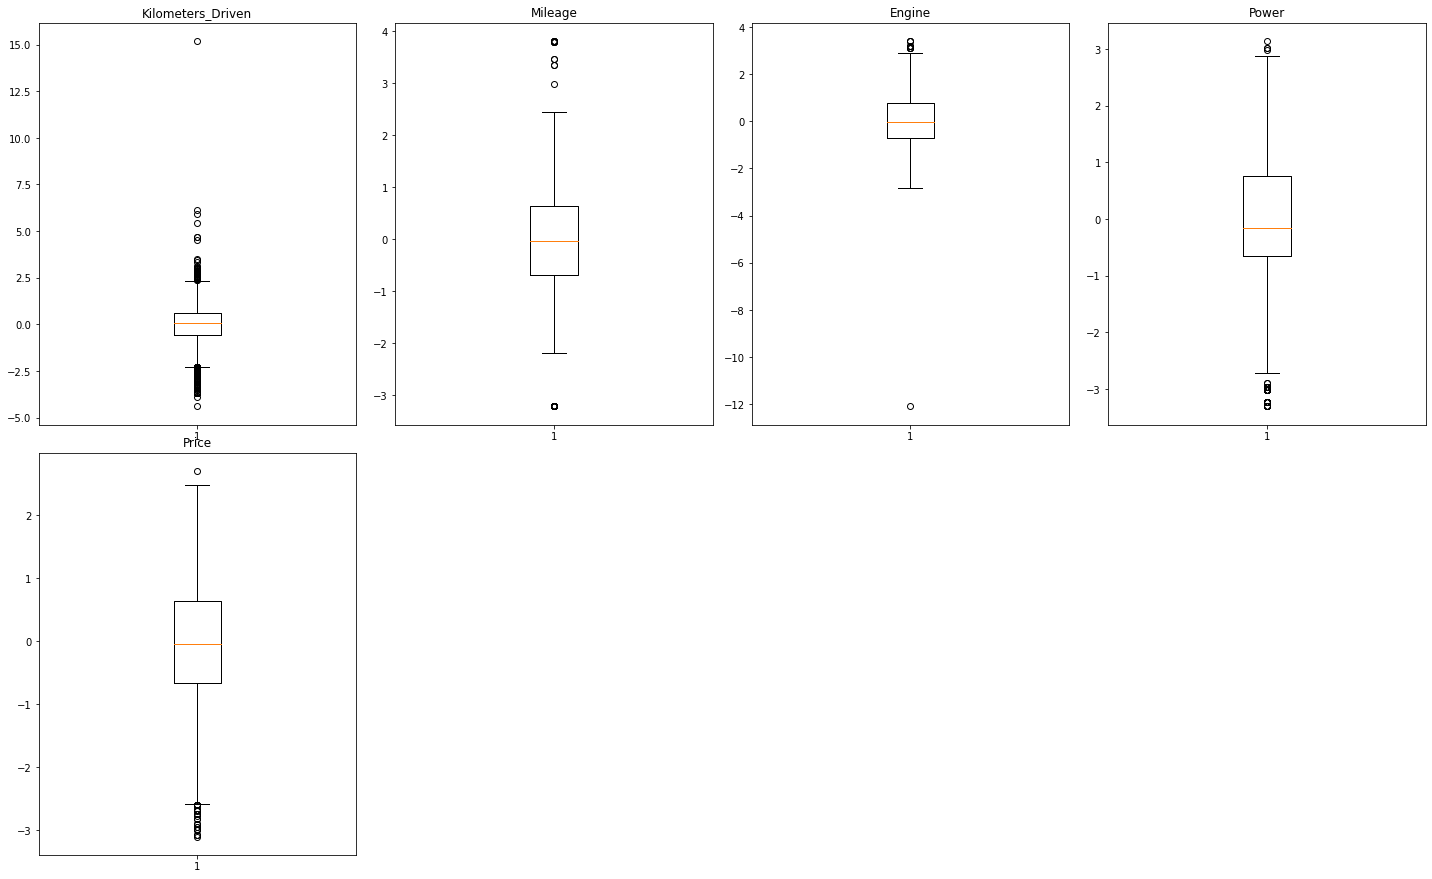

<IPython.core.display.Javascript object>

In [51]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**
* All numerical columns have outliers.
* We will treat these outliers as these might adversely affect the predictive power of linear model.

### Outlier Treatment

In [52]:
# Let's treat outliers by flooring and capping
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [53]:
# treating outliers
df = treat_outliers_all(df, num_col)

<IPython.core.display.Javascript object>

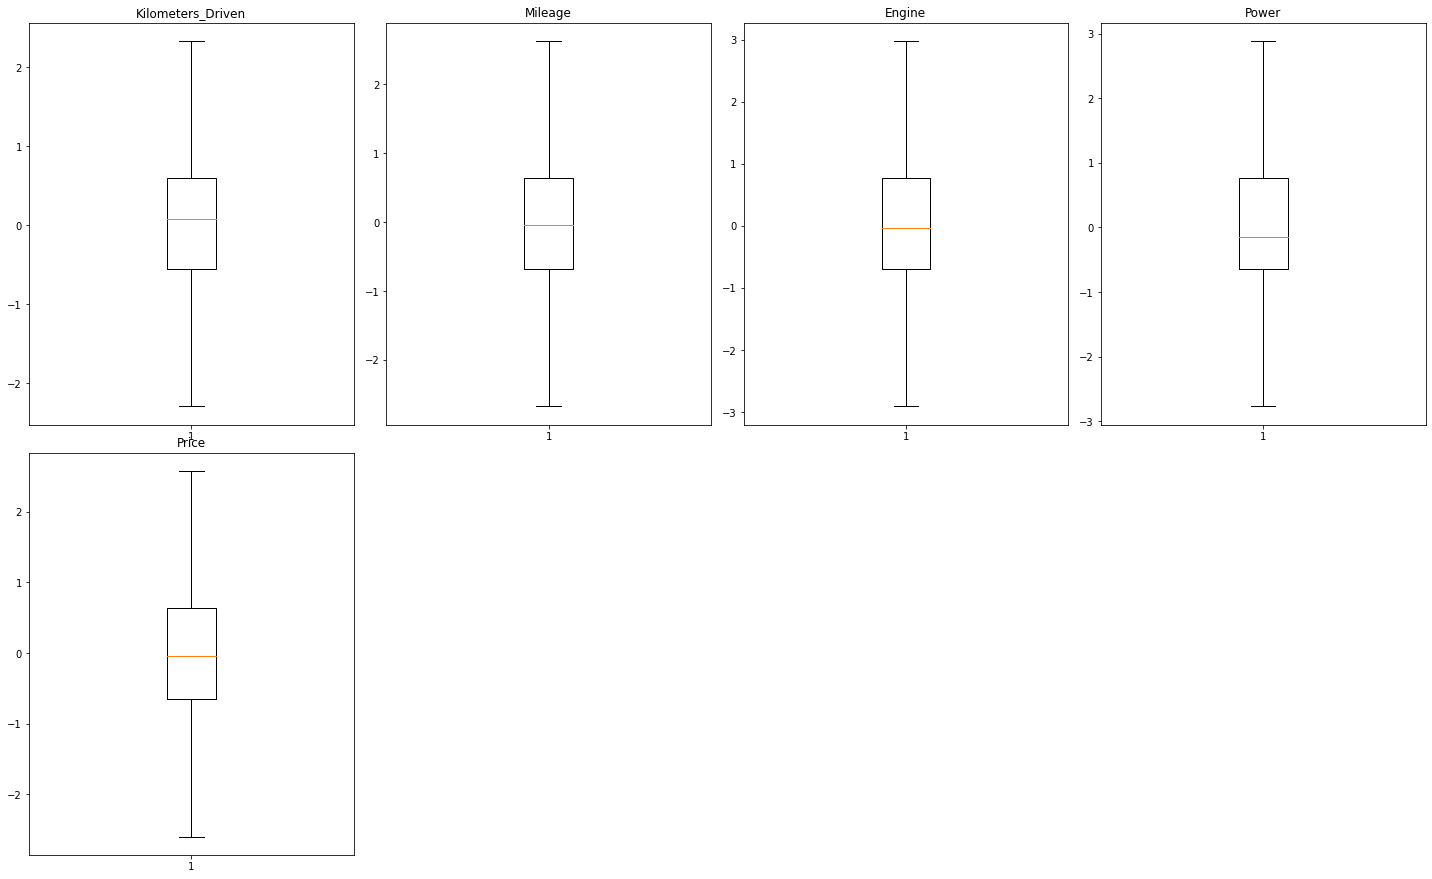

<IPython.core.display.Javascript object>

In [54]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation**
* Outliers seem to be non-existent now from this visualization.

### Let's see the effect of outlier treatment and transformation on our features

### Distribution of numeric variables

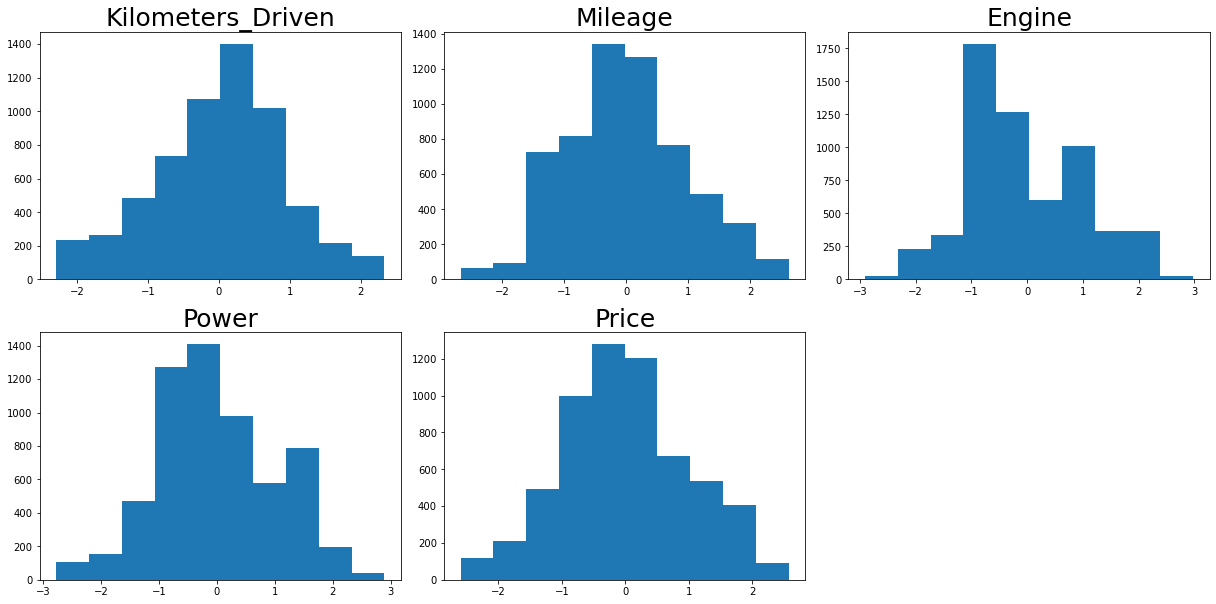

<IPython.core.display.Javascript object>

In [55]:
# lets plot histogram of all numerical variables

all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove("Year")  # excluding year from analysis
plt.figure(figsize=(17, 75))


for i in range(len(all_col)):
    plt.subplot(18, 3, i + 1)
    plt.hist(df[all_col[i]])
    # sns.histplot(df[all_col[i]], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(all_col[i], fontsize=25)

plt.show()

**Observation**
* Feature distribution is much improved and closer to normal distribution

## Data Preparation for Modeling

In [56]:
# defining X and y variables
X = df.drop(["Price"], axis=1)
y = df[["Price"]]

print(X.head())
print(y.head())

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010           0.574209       CNG       Manual      First   
1        Pune  2015          -0.297718    Diesel       Manual      First   
2     Chennai  2011          -0.130116    Petrol       Manual      First   
3     Chennai  2012           0.898186    Diesel       Manual      First   
4  Coimbatore  2013          -0.309295    Diesel    Automatic     Second   

    Mileage    Engine     Power Seats Brandgroup  
0  1.985385 -1.279377 -1.504560   5.0     Brand1  
1  0.303903  0.139176  0.563423   5.0     Brand1  
2 -0.031168 -0.699935 -0.303525   5.0     Brand1  
3  0.559875 -0.576026 -0.301749   7.0     Brand1  
4 -0.688486  0.770572  0.809748   5.0     Brand4  
      Price
0 -1.584667
1  0.881693
2 -0.326856
3  0.038999
4  1.230358


<IPython.core.display.Javascript object>

In [57]:
print(X.shape)
print(y.shape)

(6009, 11)
(6009, 1)


<IPython.core.display.Javascript object>

In [58]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=[
        "Location",
        "Fuel_Type",
        "Transmission",
        "Owner_Type",
        "Brandgroup",
        "Seats",
    ],
    drop_first=True,
)
X.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brandgroup_Brand2,Brandgroup_Brand3,Brandgroup_Brand4,Brandgroup_Brand5,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,2010,0.574209,1.985385,-1.279377,-1.504560,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2015,-0.297718,0.303903,0.139176,0.563423,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2011,-0.130116,-0.031168,-0.699935,-0.303525,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2012,0.898186,0.559875,-0.576026,-0.301749,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2013,-0.309295,-0.688486,0.770572,0.809748,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [59]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [60]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brandgroup_Brand2,Brandgroup_Brand3,Brandgroup_Brand4,Brandgroup_Brand5,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
928,2011,-0.082760,-0.187807,-0.702526,-0.758389,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3266,2015,-2.252771,-1.731648,1.916690,2.424047,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
45,2016,0.054291,-0.882438,0.512381,0.765802,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1262,2015,-1.065464,0.218799,0.770572,0.812875,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1097,2014,0.950375,0.851199,0.139176,0.563423,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

## Choose, train and evaluate the model

In [61]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [62]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(linearregression.coef_[0], linearregression.intercept_[0]),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year,0.135888
Kilometers_Driven,-0.053143
Mileage,-0.002774
Engine,0.151416
Power,0.345032
Location_Bangalore,0.145963
Location_Chennai,-0.006023
Location_Coimbatore,0.088702
Location_Delhi,-0.097890
Location_Hyderabad,0.130691


<IPython.core.display.Javascript object>

**Let's check the performance of the model using different metrics (MAE, MAPE, RMSE, $R^2$).**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE.
* We will create a function which will print out all the above metrics in one go.

In [63]:
# defining function for MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# defining common function for all metrics
def model_perf(model, inp, out):
    """
    model: model
    inp: independent variables
    out: dependent variable
    """
    y_pred = model.predict(inp).flatten()
    y_act = out.values.flatten()

    return pd.DataFrame(
        {
            "MAE": mean_absolute_error(y_act, y_pred),
            "MAPE": mape(y_act, y_pred),
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "R^2": r2_score(y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [64]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(linearregression, X_train, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.221077,-8.99958,0.301771,0.907835


<IPython.core.display.Javascript object>

In [65]:
# Checking model performance on test set (unseen 30% data)
print("Test Performance\n")
model_perf(linearregression, X_test, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.228337,-19.202779,0.296721,0.912624


<IPython.core.display.Javascript object>

**Observations**

- The training and testing scores are 90.7% and 91.2% respectively, and both the scores are comparable. Hence, the model is a good fit.

- R-squared is 0.912 on the test set, i.e., the model explains 91.2% of total variation in the test dataset. So, overall the model is very satisfactory.

## Linear Regression using statsmodels

In [66]:
# Let's build linear regression model using statsmodel
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:51:06   Log-Likelihood:                -928.91
No. Observations:                4206   AIC:                             1930.
Df Residuals:                    4170   BIC:                             2158.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *Price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *Price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- We need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

**1. No Multicollinearity**

**2. Mean of residuals should be 0**

**3. No Heteroscedasticity**

**4. Linearity of variables**

**5. Normality of error terms**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**: If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all. Whereas, if VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity, and if it is 10 or exceeding 10, it shows signs of high multicollinearity.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns
)
print("VIF Scores: \n\n{}\n".format(vif_series1))

VIF Scores: 

const                        876591.551228
Year                              2.277637
Kilometers_Driven                 1.944920
Mileage                           3.271689
Engine                           10.986341
Power                             7.932864
Location_Bangalore                2.474895
Location_Chennai                  2.979629
Location_Coimbatore               3.520801
Location_Delhi                    3.167724
Location_Hyderabad                3.820874
Location_Jaipur                   2.676888
Location_Kochi                    3.575984
Location_Kolkata                  3.133880
Location_Mumbai                   4.007121
Location_Pune                     3.427951
Fuel_Type_Diesel                 28.660088
Fuel_Type_Electric                1.046641
Fuel_Type_LPG                     1.193990
Fuel_Type_Petrol                 29.407561
Transmission_Manual               2.188969
Owner_Type_Fourth & Above         1.014249
Owner_Type_Second                 1.1717

<IPython.core.display.Javascript object>

* *Engine* and *Power* have a VIF score of much greater than 5.
* Clearly these 2 variables are correlated with each other.
* This does seem to make intuitive sense because the higher an engine's displacement, the more power it should be able to generate.

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has VIF score greater than 5.
2. Look at the adjusted R-squared of all these models.
3. Drop the variable that makes least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [68]:
# we drop the one with the highest vif values and check the adjusted R-squared
X_train2 = X_train1.drop("Power", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                        869881.137979
Year                              2.243311
Kilometers_Driven                 1.968442
Mileage                           3.318441
Engine                            4.323405
Location_Bangalore                2.244859
Location_Chennai                  2.742081
Location_Coimbatore               3.145771
Location_Delhi                    2.837018
Location_Hyderabad                3.489027
Location_Jaipur                   2.499740
Location_Kochi                    3.296469
Location_Kolkata                  2.857339
Location_Mumbai                   3.596944
Location_Pune                     3.102279
Fuel_Type_Diesel                 26.911254
Fuel_Type_Electric                1.029586
Fuel_Type_LPG                     1.160935
Fuel_Type_Petrol                 27.474190
Transmission_Manual               2.177021
Owner_Type_Fourth & Above         1.009942
Owner_Type_Second                 1.158701
Owner_Type_Third                  1.1086

<IPython.core.display.Javascript object>

* That seemed to have helped, VIF has come down to quite a good limit, now we can say features are not correlated.

In [69]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1025.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:51:18   Log-Likelihood:                -1240.7
No. Observations:                4206   AIC:                             2551.
Df Residuals:                    4171   BIC:                             2773.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

* Earlier adj. R-squared was 0.907, now it is reduced to 0.892.
* Let's see if we would get better results after dropping *Engine*

In [70]:
X_train3 = X_train1.drop("Engine", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                        885201.862881
Year                              2.279689
Kilometers_Driven                 1.961629
Mileage                           2.923624
Power                             3.189955
Location_Bangalore                2.245380
Location_Chennai                  2.743692
Location_Coimbatore               3.146853
Location_Delhi                    2.837503
Location_Hyderabad                3.493184
Location_Jaipur                   2.502797
Location_Kochi                    3.296479
Location_Kolkata                  2.857273
Location_Mumbai                   3.597534
Location_Pune                     3.103849
Fuel_Type_Diesel                 27.084964
Fuel_Type_Electric                1.029864
Fuel_Type_LPG                     1.158826
Fuel_Type_Petrol                 27.419603
Transmission_Manual               2.233166
Owner_Type_Fourth & Above         1.009936
Owner_Type_Second                 1.158628
Owner_Type_Third                  1.1088

<IPython.core.display.Javascript object>

* Results are almost similar but slightly better as per VIF scores. We can check adj. R-squared for both the data, and then decide which one to proceed with accordingly.

In [71]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1179.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:51:21   Log-Likelihood:                -975.63
No. Observations:                4206   AIC:                             2021.
Df Residuals:                    4171   BIC:                             2243.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

* We can see adj. R-squared for *olsmod2* is 0.905 while for *olsmod1* it is 0.892, i.e., when we drop *Engine* we get better results. So, we will proceed with *olsmod2*.

* Now the above model has no multicollinearity, so we can look at p-values of predictor variables to check their significance.

**Observation**

* The p-values of the predictor variables are less than 0.05, which proves their significance to the model.
* Now adjusted R-squared is 0.905, i.e., our model is able to explain 90.5% of variance. This shows that the model is good.
* The adjusted R-squared in *olsres0* (where we considered all the variables) was 0.907. This shows that the variables we dropped were not affecting the model much.

### Now we'll check the rest of the assumptions on model *olsres2*

2. Mean of residuals should be 0 
3. Linearity of variables
4. Normality of error terms
5. No Heteroscedasticity

### MEAN OF RESIDUALS SHOULD BE 0

In [72]:
residual = olsres2.resid
np.mean(residual)

3.2853716577166907e-13

<IPython.core.display.Javascript object>

* Mean of redisuals is very close to 0.

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals, if they don't follow any pattern, they we say the model is linear, otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [73]:
residual = olsres2.resid
fitted = olsres2.fittedvalues  # predicted values

<IPython.core.display.Javascript object>

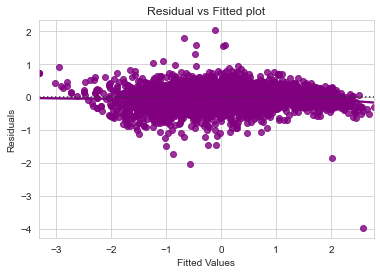

<IPython.core.display.Javascript object>

In [74]:
sns.set_style("whitegrid")
sns.residplot(fitted, residual, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted plot")
plt.show()

* Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumption is satisfied.**

### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

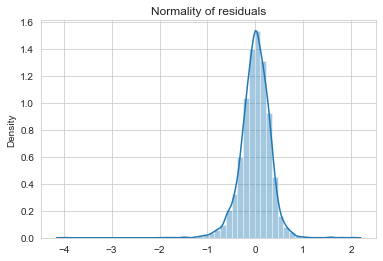

<IPython.core.display.Javascript object>

In [75]:
sns.distplot(residual)
plt.title("Normality of residuals")
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

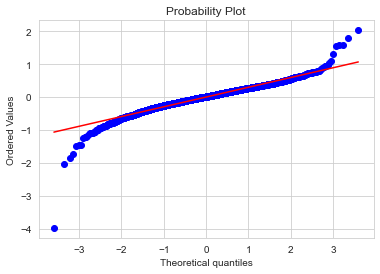

<IPython.core.display.Javascript object>

In [76]:
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()

In [77]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9478843808174133, pvalue=3.091680003793902e-36)

<IPython.core.display.Javascript object>

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal.
* Hence we go with the QQ plot and say that residuals are normal.
* We can try to treat data for outliers and see if that helps in further normalizing the residual curve.

### TEST FOR HOMOSCEDASTICITY

* Test - goldfeldquandt test

* **Homoscedacity**: If the variance of the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

* **Heteroscedacity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

For goldfeldquandt test, the null and alternate hypotheses are as follows:

- Null hypothesis : Residuals are homoscedastic
- Alternate hypothesis : Residuals have heteroscedasticity

In [78]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, X_train3)
lzip(name, test)

[('F statistic', 0.8981110329801709), ('p-value', 0.992731081286226)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.**

**Now we have checked all the assumptions and they are satisfied, so we can move towards the prediction part.**

### Predicting on the test data

In [79]:
X_train3.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Power',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Brandgroup_Brand2', 'Brandgroup_Brand3', 'Brandgroup_Brand4',
       'Brandgroup_Brand5', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0'],
      dtype='object')

<IPython.core.display.Javascript object>

In [80]:
# Selecting columns from test data that we used to create our final model
X_test_final = X_test[X_train3.columns]

<IPython.core.display.Javascript object>

In [81]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Power,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brandgroup_Brand2,Brandgroup_Brand3,Brandgroup_Brand4,Brandgroup_Brand5,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
79,1.0,2005,0.910084,-2.677487,-0.152752,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2752,1.0,2017,0.277304,0.637514,-1.666734,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3299,1.0,2012,0.898186,-1.236667,1.192137,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1169,1.0,2010,-0.368957,-0.764826,1.210333,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3429,1.0,2014,2.099245,0.152453,0.206037,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [82]:
# Checking model performance on train set (seen 70% data)
print("Train Performance\n")
model_perf(olsres2, X_train3.values, y_train)

Train Performance



,MAE,MAPE,RMSE,R^2
0,0.223891,-7.023621,0.305142,0.905765


<IPython.core.display.Javascript object>

In [83]:
# Checking model performance on test set (seen 70% data)
print("Test Performance\n")
model_perf(olsres2, X_test_final.values, y_test)

Test Performance



,MAE,MAPE,RMSE,R^2
0,0.233626,-20.733889,0.303519,0.908575


<IPython.core.display.Javascript object>

* Now we can see that the model has low test and train RMSE and MAE, and both the errors are comparable. So, our model is not suffering from overfitting.

* The model is able to explain 90.8% of the variation on the test set, which is very good.


**Hence, we can conclude the model *olsres2* is good for prediction as well as inference purposes.**

In [84]:
# let us print the model summary

olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1179.
Date:                Fri, 09 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:51:45   Log-Likelihood:                -975.63
No. Observations:                4206   AIC:                             2021.
Df Residuals:                    4171   BIC:                             2243.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

## Conclusions

***olsres2* is our final model which follows all the assumptions, and can be used for interpretations.**

1. As *Kilometers_Driven* and *Mileage* increase, the prices of used cars decrease, as is visible in the negative coefficient sign.


2. *Year* and *Power* have positive coefficients. So as they increase, *Price* will also increase.


## Business Insights

1. Cars driven many kilometers by previous owners with high mileage numbers tend to sell for less.


2. Newer model cars, i.e. recently manufactured cars, will fetch a higher price in the market. This is also true for cars with high maximum engine power.


3. Diesel and Electric cars are generally more expensive than Petrol, CNG and LPG.


4. Automatic cars are priced higher than Manual vehicles.


5. The higher the number of previous owners the lower the price and vice-versa.


6. Brand names have a significant effect on used car prices.


## Recommendations

1. This model can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.


2. More features and observations required for car models and brand analysis, to improve product segmentation, which will have a positive effect on pricing system.


3. Customer data analysis for previously sold used cars could aid in decoding customer buying patterns and price preferences.

